This notebook demonstrates how the KMeans algorithm works.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Create 2D normal distribution clusters using numpy.
np.random.seed(0)
n = 1000
x1 = np.random.normal(0, 1, n)
y1 = np.random.normal(0, 1, n)
x2 = np.random.normal(5, 1, n)
y2 = np.random.normal(5, 1, n)
x3 = np.random.normal(10, 1, n)
y3 = np.random.normal(0, 1, n)

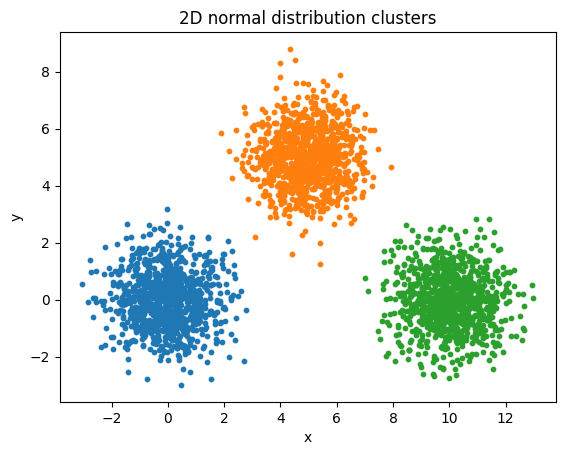

In [5]:
# Plot the clusters.
plt.scatter(x1, y1, s=10)
plt.scatter(x2, y2, s=10)
plt.scatter(x3, y3, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D normal distribution clusters')
plt.show()

In [6]:
# Create a pandas dataframe with the data.
df = pd.DataFrame({
    'x': np.concatenate([x1, x2, x3]),
    'y': np.concatenate([y1, y2, y3])
})
df

,x,y
0,1.764052,0.555963
1,0.400157,0.892474
2,0.978738,-0.422315
3,2.240893,0.104714
4,1.867558,0.228053
...,...,...
2995,9.898626,-1.330804
2996,10.746666,0.352599
2997,10.929182,-0.537885
2998,10.229418,0.393444


In [7]:
# Create our own kmeans model class.
class KMeans:
    def __init__(self, k, max_iter=1000):
        self.k = k
        self.max_iter = max_iter

    def fit(self, data):
        n = data.shape[0]
        self.centroids = data[np.random.choice(n, self.k, replace=False)]
        for i in range(self.max_iter):
            # Assign each data point to the closest centroid.
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update the centroids.
            new_centroids = np.array([data[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Check if the centroids have converged.
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

In [10]:
# Fit the kmeans model to the data.
kmeans = KMeans(k=3)
kmeans.fit(df.values)
kmeans.centroids

array([[10.02818069, -0.01905327],
       [ 4.94877144,  4.9810574 ],
       [-0.04525671,  0.01361694]])

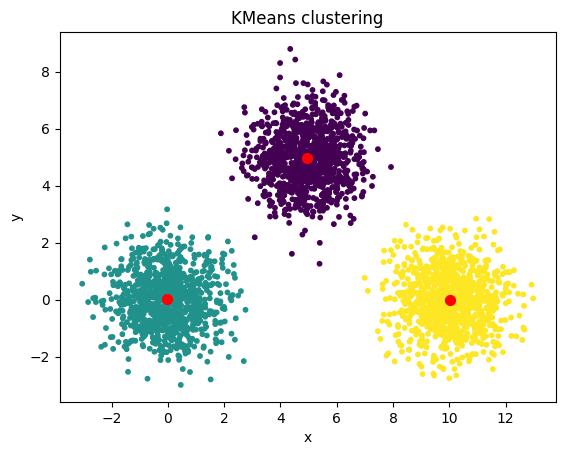

In [9]:

# Plot the clusters and centroids.
plt.scatter(df['x'], df['y'], c=kmeans.labels, s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans clustering')
plt.show()